Shape of X,y (150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets are:  ['setosa' 'versicolor' 'virginica']


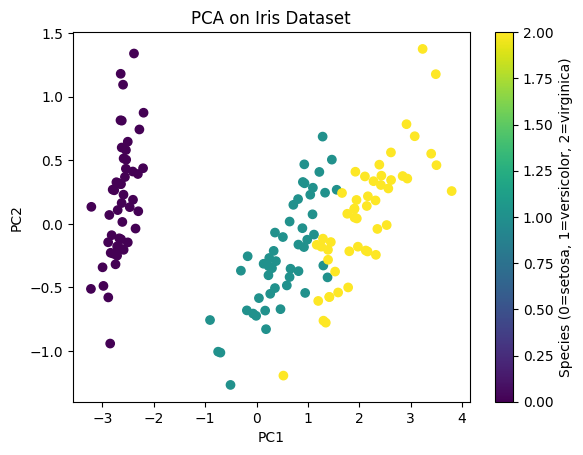

NameError: name 'pca' is not defined

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
print('Shape of X,y',X.shape,y.shape)
print(iris.feature_names)
target_names = iris.target_names
print('Targets are: ',target_names)
# PCA: reduce to 2D
X_pca = PCA(n_components=2).fit_transform(X)


# Plot directly
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA on Iris Dataset")
plt.colorbar(label="Species (0=setosa, 1=versicolor, 2=virginica)")
plt.savefig('C:/Users/Asus/ML_Programs/IRIS_PCA.jpg')
plt.show()


explained_var = pca.explained_variance_ratio_ * 100 
#pca.explained_variance_
#print('Explained variance 1st two components',explained_var)
print('Explained variance ratio:',explained_var)
print('Singular Values',pca.singular_values_)


plt.bar(range(1, len(explained_var) + 1), explained_var, alpha=0.7, align="center")
plt.plot(range(1, len(explained_var) + 1), explained_var, "ko-")

plt.xlabel("Principal Components")
plt.ylabel("Percentage of explained variance")
plt.title("Data Reduction (PCA)", fontsize=14, color="darkred", weight="bold")

# Save and Show
plt.savefig("pca_scree_plot.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Train-test split manually
# ---------------------------
np.random.seed(42)  # reproducibility
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

# 80% train, 20% test
split = int(0.8 * len(indices))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# ---------------------------
# Train Model
# ---------------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# ---------------------------
# Prediction
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# ---------------------------
# Visualization of Confusion Matrix
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1,2], iris.target_names)
plt.yticks([0,1,2], iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Annotate values
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")

plt.show()
